In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Show what information is in the measurement data set
measurement_info = session.query(Measurement).first()
measurement_info.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x16361fef0>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08}

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [11]:
#Calculate the date one year from the last date in data set.

dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

datetime.datetime(2016, 8, 23, 0, 0)

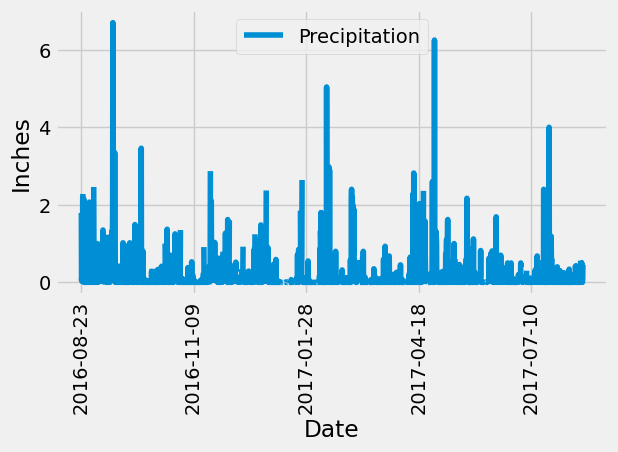

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.


# Perform a query to retrieve the data and precipitation scores and put into variable
yearly_precipitation = []
yearly_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23')

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(yearly_precipitation, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
rain_df.set_index('Date', inplace=True)
rain_sorted = rain_df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
rain_sorted.plot(xlabel='Date', ylabel='Inches')
plt.xticks(rotation=90)

#Display Graph
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [14]:
# Show what information is in the station data set
station_info = session.query(Station).first()
station_info.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1638304d0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [15]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station.name).distinct().count()
stations

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_count = session.query(
    Station.station,
    func.count(Measurement.station).label('station_count')
).join(Measurement, Measurement.station == Station.station)\
.group_by(Station.station)\
.order_by(func.count(Station.id).desc()).all()

stations_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_average = [func.min(Measurement.tobs),
                   func.max(Measurement.tobs),
                   func.avg(Measurement.tobs)]

active_station_average = session.query(*station_average)\
    .filter(Measurement.station == 'USC00519281').all()

active_station_average

[(54.0, 85.0, 71.66378066378067)]

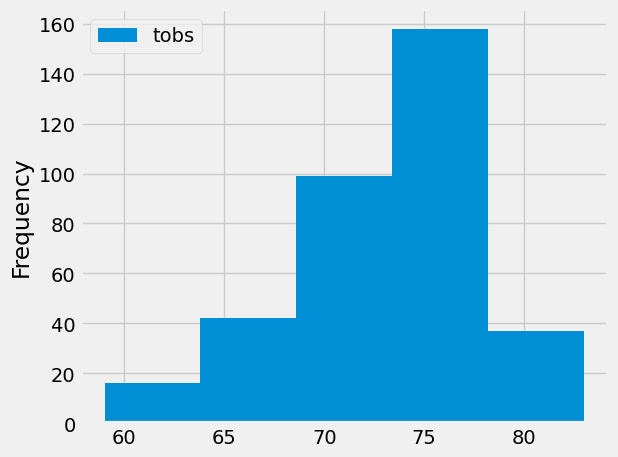

In [22]:
# Using the most active station id
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearly_temp = []
yearly_temp = session.query(Measurement.date, Measurement.tobs).\
    filter((Measurement.date >= '2016-08-23') & (Measurement.station == 'USC00519281')).all()

# Save the query results as a Pandas DataFrame
temp_df = pd.DataFrame(yearly_temp, columns=['Date', 'tobs'])


# Use Pandas Plotting with Matplotlib to plot the data
temp_df.plot.hist(by=None, bins=5)

#Display Graph
plt.tight_layout()
plt.show()

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [24]:
# Close Session
session.close()
